# Problem Statement
## High on Cloud Wine: Predicting the Quality of Wine
From seed to wine, the process of making the said alcohol is said to take up to 5 years before the liquid is bottled and sold to the market for consuming. Moreoever, the sheer level of detail that vintners, or winemakers, need to pay attention to is immense due to the complexities of the taste of the alcohol. A lot of factors goes into this including the type of fruits invovled, the temperature that the fruits were grown in and where the barrels for fermentation were kept, the alcohol content in the drink and a lot more ("Wine Production", 2018). This is why it is important to figure out the quality of wine, not only for the producers to assure the quality of their products, but also for consumers as well to decide which wine they should try out as a beginner trying to get into alcoholic drinks, and for sommeliers as well to decide which ones to pair with their meal/s. This shows the importance of determining the quality of wine since it will take years to process one.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.random.seed(1)
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

## Red Wine Quality Dataset
The [Wine Quality Dataset](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) (titled **`winequality-red.csv`**) consists of 1599 red and white wine variants of the "Vinho Verde" wine from Portugal. The data was retrieved from a study conducted by Cortez, P. et al. and was uploaded and shared to Kaggle by the staff of **UCI Machine Learning Repository** under the same name. Each row available in the dataset consists of values coming from physiochemical and sensory variables. Information about the producers, grape type and selling prices are said to be unavailable due to privacy and logistic reasons.

In [3]:
main_df = pd.read_csv("./winequality-red.csv")
main_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Below is the list of features, their descriptions and their label:
- **`fixed acidity`**: Acids that do not evaporate quickly (g(tartaric acid)/dm^3).
- **`volatile acidity`**: Acetic acid that gives a vinegary taste when too much is added (g(acetic acid)/dm^3).
- **`citric acid	`**: Adds freshness to the flavor of the wine (g/dm^3).
- **`residual sugar	`**: Amount of sugar after fermentation (g/dm^3).
- **`chlorides`**: Amount of salt (g(sodium chloride)/dm^3).
- **`free sulfur dioxide`**: Amount of free form sulfure dioxide used to prevent microbial growth and oxidation (mg/dm^3).
- **`total sulfur dioxide`**: Amount of free and bound forms of sulfur dioxide (mg/dm^3).
- **`density`**: Density of water (grams/cm^3).
- **`pH`**: How acidic (0) or basic (14) the wine is.
- **`sulphates`**: An additive that contributes to sulfur dioxide gas (g(potassium sulphate)/dm^3).
- **`alcohol`**: Alcohol content percentage (vol.%).
- **`quality`**: Quality of the wine with 0 being the lowest and 10 being the highest.

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Because the features available in the data are all measurements of some sort of content in the wine, the labels are all set to a float data type, excluding the quality feature which is in the form of an integer. <br><br>
Additionally, the info also tells us that the dataset does not contain any null values, therefore not needing to dabble with any of the labels.

As stated by the owner of the dataset, the **quality** feature must be within the range of 0-10. To determine whether this is reflected in the dataset itself, we will now proceed to execute the code below to verify this claim.

In [5]:
print("quality: " + str(main_df["quality"].min()) + " – " + str(main_df["quality"].max())) # Range: [0 – 10]

quality: 3 – 8


As seen above, the minimum value found for the **quality** feature is three (3) whereas the maximum value found is eight (8), therefore, the aforementioned statement is valid for this dataset.

# Simple Data Analysis on Wine Quality Data

We will now begin to dive down into the analysis of the features within the dataset.

### EDA #1: Studying the distributions of the continuous features in the Wine Quality data.

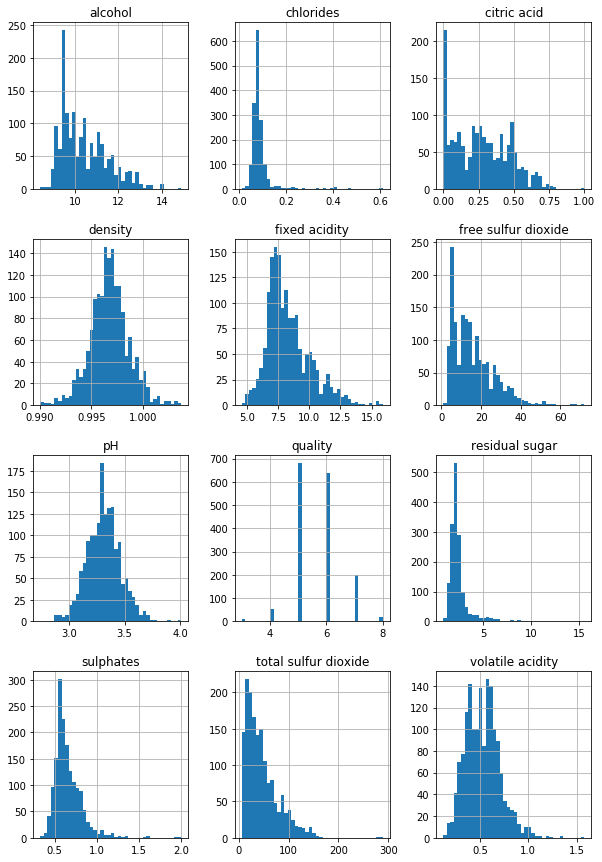

In [6]:
main_df.hist(bins=40, figsize=(10,15))
plt.show()

As seen in the tables above, we can observe a positive skew in the **sulphates**, **alcohol**, **chlorides**, **total sulfur dioxide**, **free sulfur dioxide**, **residual sugar**, **fixed acidity**, **citric acid** and **volatile acidity** features. Whereas the **ph**, and **density** features are normally skewed.

### EDA #2: Studying the correlations between the features in the Wine Quality data.

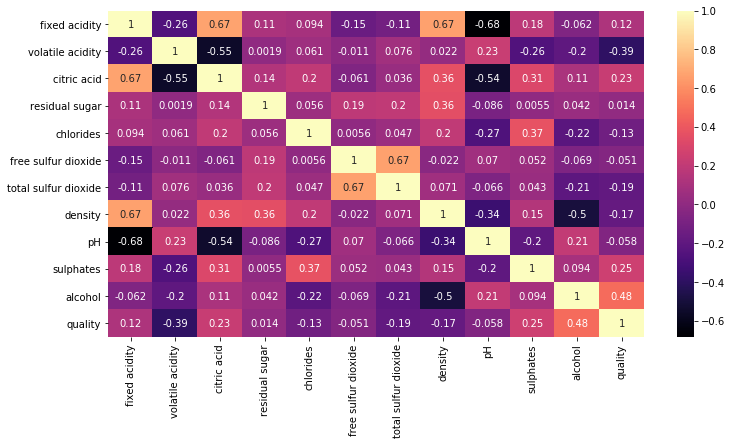

In [7]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(main_df.corr(), annot=True, cmap=plt.cm.magma)

To determine the correlation between the features presented, a heatmap will be used wherein the **Pearson's Correlation Coefficient (PCC)** will be used as the value for the relationship between two features. A value that is closer to positive 1 indicates a stronger relationship (where one one variable increases, the other is also most likely to increase). On the contrary, a PCC value closer to negative 1 will have little to no relationship. 

In our case, the threshold established is automatically set from the values that the dataset has provided, making the minimum value -0.68, and the maximum value a +1.

As observed in the heatmap above, there seems to be a positive correlation between the amomunt of **fixed acidity** with the amount of **citric acid** in the wine and the **density** of a wine. This is due to the fact that citric acid (National Library of Medicine, n.d.a) and tartaric acid, or fixed acid, (National Library of Medicine, n.d.b) are both relatively denser than water, therefore affecting the density of the wine as well. 

Additionally, it is also observed that there exists a somewhat strong relationship as well between **free sulfur dioxide** and **total sulfur dioxide**. This is to be expected since both of these features contain values both related to the amount of some sort of sulfure dioxide in the wine.

As mentioned earlier, the **Wine Quality dataset** also kept tabs on the **pH** levels of the wine samples, wherein acidic samples would be associated with a lower **pH** level, and the other way around for more basic samples. This is proven by the heatmap wherein the **pH** level of the samples is observed to have a negative relationship with the **fixed acidity** and the **citric acid** of the wines, where the acid levels of the two latter features should lower the **pH** level of the wine. However, this is not true with the amount of acetic acid, in the form of **volatile** acid, wherein a positive correlation is observed between the aforesaid acid and the **pH**. 

Lastly, by using the heatmap, we can observe how each of the features of the wine affects the overall **quality** of a specific sample. We can observe a positive correlation between the **quality** feature and the amount of **alcohol** present in the wine. On the other hand, there seems to be a negative correlation between the **quality** and the acidity of the wine, indicating that the testers did not have a strong liking towards wines that are more sour to taste. 

### EDA #3: Bivariate analysis on a few features.

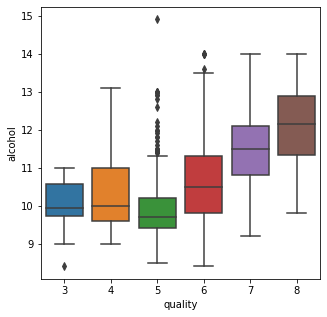

In [8]:
fig = plt.figure(figsize=(5,5)) 
sns.boxplot(x="quality", y="alcohol", data=main_df)
plt.show()

In [9]:
main_df[['quality', 'alcohol']].groupby(['quality'], as_index=False).mean().sort_values(by='alcohol', ascending=False)

,quality,alcohol
5,8,12.094444
4,7,11.465913
3,6,10.629519
1,4,10.265094
0,3,9.955000
2,5,9.899706


The boxplot above shows that higher quality wines usually have higher alcohol percentages with wines of quality rating 8 having an average of 12.09% alcohol content. Outliers with high alcohol percentages are present in wines with quality 5 and 6 while wines with quality of 3 has outliers with very low alcohol content.

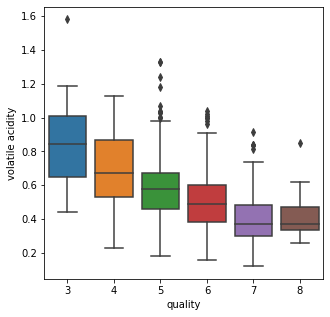

In [10]:
fig = plt.figure(figsize=(5,5)) 
sns.boxplot(x="quality", y="volatile acidity", data=main_df)
plt.show()

In [11]:
main_df[['quality', 'volatile acidity']].groupby(['quality'], as_index=False).mean().sort_values(by='volatile acidity', ascending=False)

,quality,volatile acidity
0,3,0.884500
1,4,0.693962
2,5,0.577041
3,6,0.497484
5,8,0.423333
4,7,0.403920


As was previously shown in the heatmap, the relationship between the acidity and the quality of the wine is negatively correlated with wines of quality 3 having an average volatile acidity of 0.884500. It is also shown in the boxplot that the acidity median of wines with qualities 7 and 8 are quite close to each other.

# Machine Learning Techniques to Predict Wine Quality

This study aims to predict the quality of wine by using a type of machine learning model called classifiers. These models are designed to predict a certain value given a set of data points fed to the model (Asiri, 2018). Since we are only predicting the quality of wine based on a numerical score of three (3) to six (6), this kind of model would be deemed appropriate for this study. 

The algorithms that we have decided to use would be **Decision Trees** and **Naive Bayes** due to its nature of being able to handle multiple classes for predicting problems (CFI, n.d.;Vadapalli, 2021).

## Model #1: Decision Trees

The feature columns are first extracted by obtaining every column present in the dataset. The **quality** column is then dropped as it will be the basis for the studie's label, as seen in line 3 wherein the said column is extracted. 

In [12]:
# Extract feature columns for X and label column for y
X = main_df.drop(['quality'], axis=1).values
y = main_df['quality'].values

print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


The data obtained from the dataset is then split into training sets, namely `X_train`, `y-train`, `X_test`, and `y_test`, in order to allot a certain number of samples for testing the accuracy of the model.

In [13]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

The model to be used for the first method is called DecisionTreeClassifier. This is imported from the sklearn library as seen in line 2. The model will then be initialized into the variable `dtc`, wherein the training sets initialized earlier will be used to train the said model.

In [14]:
# Import and initialize Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Train the sets
dtc = dtc.fit(X_train, y_train)

# Predict the sets and get the accuracy
predictions = dtc.predict(X_test)
print("Accuracy: " + str(dtc.score(X_test, y_test) * 100) + "%")

Accuracy: 60.25%


As observed in lines 9 and 10, the methods `predict` and `score` was used to obtain the regression value of the samples under X_test and to predict the mean accuracy of the model respectively.

### Decision Tree Hyperparameter Tuning

In these block of codes, we will tune the model by searching for the best values for the parameters `max_depth`, `min_samples_leaf`, `min_samples_split`, and `criterion`, after which we will fit in the model to test whether the accuracy has increased or not.

In [29]:
tree_params = {
    'max_depth' : range(1,40),
    'min_samples_leaf' : range(20,400,40),
    'min_samples_split' : range(20,400,40),
    'criterion' : ['gini','entropy'] 
}

A new `DecisionTreeClassifier` variable is then initialized in order to test the values defined in the variable `tree_params` throughout several iterations of fitting and checking the accuracy of the said model. Moreover, `GridSeachCV`, an sklearn function to loop through several predefined hyperparamters, will be used to fit the model with the training sets.

In [30]:
dTemp = DecisionTreeClassifier()

grid_obj = GridSearchCV(dTemp, tree_params, return_train_score=True)
grid_obj = grid_obj.fit(X_train, y_train)

In [31]:
print("The highest score of " + str(grid_obj.best_score_) + " has been attained. The paramteres chosen are: " + str(grid_obj.best_params_))

The highest score of 0.5979951185495118 has been attained. The paramteres chosen are: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 20}


The parameters presented above are then chosen to initialize a new model containing the most optimal values for certain parameters. Similar to the code blocks prior to tuning the hyperparameters, the new model will be fitted using the training sets, and the accuracy of the model will then be obtained afterwards.

In [32]:
# initialize new model
tree_improved = grid_obj.best_estimator_
tree_improved.fit(X_train,y_train)

# Predict the sets and get the accuracy
predictions = dtc.predict(X_test)
print("Accuracy: " + str(dtc.score(X_test, y_test) * 100) + "%")

Accuracy: 88.0%


After the hyperparameter tuning, the model has now an accuracy of 88.00% which has improved a lot from 60.25% without the tuning. 

## Model #2: Naive Bayes

Much related to the first modelling approach, the variable `y` containing the label column will exclude every column in the dataset except for the **quality** column. The sizes of the variables are then printed to display whether the appropriate columns were extracted or not.

In [18]:
# Extract feature columns for X and label column for y
X = main_df.drop(['quality'], axis=1).values
y = main_df['quality'].values

print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


By using the `train_test_split` method, the obtained samples are set into the corresponding training and testing sets.

In [19]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

The GaussianNB model is then imported and the sets are proceeded to be trained and predicted

In [20]:
# Import and initialize GaussianNB Model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train the sets and get the predictions
predictions = gnb.fit(X_train, y_train)
predictions = predictions.predict(X_test)

The accuracy is obtained by using the built-in method `score`.

In [21]:
# Print the accuracy of the model on the predictions

print("Accuracy: ", str(gnb.score(X_test, y_test) * 100) + "%")

Accuracy:  58.25%


The initial accuracy of the Naive Bayes model, as seen above, is 58.25%

### Gaussin Naive Bayes Hyperparameter Tuning
The parameter `var_smoothing` is chosen to be manipulated to attempt in improving the accuracy score of the chosen model.

In [22]:
gauss_parameters= {'var_smoothing': np.logspace(0,-9, num=100)}

Once again, GridSearchCV will be initialized with the predefined hyperparameters seen above, with gnb as its `estimator`, 3 for the `cv`, 1 for the `verbose`, and accuracy as the `scoring` strategy.

In [23]:
gs_NB = GridSearchCV(estimator=gnb, param_grid=gauss_parameters, cv=3,verbose=1,scoring='accuracy')
gs_NB.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.5...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

The best estimator will then be chosen prior to fitting the model.

In [24]:
gnb = gs_NB.best_estimator_
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1.2328467394420658e-05)

Grid search has determined that the optimal hyperparameter for the model is **1e-05** for the var_smoothing

In [25]:
print("Accuracy: ", str(gnb.score(X_test, y_test) * 100) + "%")

Accuracy:  60.0%


As observed, we have received an accuracy score of 60%, which is only a slight improvement from the previous accuracy score.

A `confusion_matrix` is then constructed in order to display the accuracy of the model wherein the `predicted` columns represents what the model has predicted given the samples, and the `true` rows represents the actual value associated with the set of features.

In [26]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,4,5,6,7,8,All
True,,,,,,
3,1,0,0,0,0,1
4,1,9,0,0,1,11
5,5,115,42,2,0,164
6,3,51,95,23,1,173
7,0,1,26,22,1,50
8,0,0,1,0,0,1
All,10,176,164,47,3,400


## References 

Apallas, A. K. (2016, July 6). The Life Cycle of a Wine Grape: From Planting to Harvest to Bottle. Wine Cooler Direct. https://learn.winecoolerdirect.com/life-cycle-of-a-wine-grape/

Asiri, S. (2018, June 11). Machine Learning Classifiers. Towards Data Science. https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547-553. https://doi.org/10.1016/j.dss.2009.05.016

Decision Tree. (n.d.). CFI. https://corporatefinanceinstitute.com/resources/knowledge/other/decision-tree/

WINE PRODUCTION: BOTTLING QUALITY CONTROL. (2018, September 18). Gravity Wine House. https://gravitywinehouse.com/blog/wine-production-bottling-quality-control-plan

National Library of Medicine. (n.d.a). Citric acid (Compound). PubChem. https://pubchem.ncbi.nlm.nih.gov/compound/Tartaric-acid#section=Density

National Library of Medicine. (n.d.b). Tartaric acid (Compound). PubChem. https://pubchem.ncbi.nlm.nih.gov/compound/Tartaric-acid#section=Density

Vadapalli, P. (2021, January 5). Naive Bayes Explained: Function, Advantages & Disadvantages, Applications in 2021. Upgrad. https://www.upgrad.com/blog/naive-bayes-explained/